In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
tf.random.set_seed(42)

## Define Augmenters

In [4]:
def get_gaussian_kernel(k: int, sigma: float) -> tf.Tensor:
    """
        Get kxk 2D gaussian kernel.
        args:
            k: int - Kernel size.
            sigma: float - Blur strength.
        returns:
            kernel_gauss: tf.Tensor - Gaussian kernel tensor.
    """

    x = tf.range(-k // 2 + 1, k // 2 + 1, dtype = tf.float32)
    
    x_gauss = tf.math.exp(-(tf.pow(x, 2) / (2 * tf.pow(sigma, 2))))
    x_gauss = x_gauss / tf.math.sqrt((2 * 3.14159 * tf.pow(sigma, 2)))

    kernel_gauss = tf.tensordot(x_gauss, x_gauss, axes = 0)
    x_scale = tf.reduce_sum(kernel_gauss)

    kernel_gauss = kernel_gauss / x_scale
    
    return kernel_gauss

In [5]:
def apply_gaussian_noise(x_in: tf.Tensor) -> tf.Tensor:
    """
        Apply random gaussian noise to input tensor.
        
        - Blur input tensor 50% of the time
        - Randomly sample blur strength [0.1, 2.0]
        - Kernel size is 10% of the input tensor height / width
        
        args:
            x_in: tf.Tensor - Input tensor.
        returns:
            x_out: tf.Tensor - Augmented tensor.
    """
    
    roll_augment_flag = tf.random.uniform((),0,1)
    
    if roll_augment_flag >= 0.50:
        blur_strength = tf.random.uniform((),0.1,2.0)
        kernel_size = tf.cast(tf.shape(x_in)[0], tf.float32) * tf.constant(0.10)
        kernel_size = tf.cast(kernel_size, tf.int32)
                
        kernel = get_gaussian_kernel(kernel_size, blur_strength)
        kernel = kernel[..., tf.newaxis, tf.newaxis]

        x_in_reshaped = x_in[tf.newaxis, ..., tf.newaxis]

        x_out = tf.nn.conv2d(x_in_reshaped, kernel, [1,1,1,1], 'SAME')
        x_out = tf.squeeze(x_out)   
    else:
        x_out = x_in
    return x_out

## Test Gaussian Blur

2022-06-05 00:25:08.100130: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


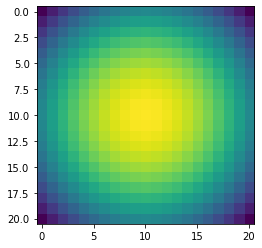

In [6]:
plt.imshow(get_gaussian_kernel(21,20.0).numpy())

In [7]:
image_test = cv2.imread('lenna.png')
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
image_test = image_test / 255.

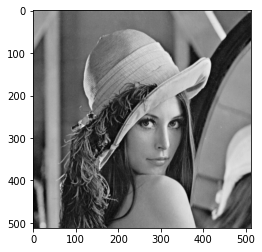

In [8]:
plt.imshow(image_test, cmap = 'gray')

In [9]:
image_test_tensor = tf.convert_to_tensor(image_test, dtype = tf.float32)

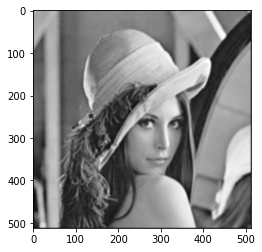

In [10]:
image_test_tensor_convolved = apply_gaussian_noise(image_test_tensor)
plt.imshow(
    np.squeeze(image_test_tensor_convolved.numpy()), cmap = 'gray')

## Scrapyard

In [11]:
x = tf.range(-9 // 2 + 1, 9 // 2 + 1, dtype = tf.float32)

In [12]:
tf.tensordot(x,x, axes = 0)

<tf.Tensor: shape=(9, 9), dtype=float32, numpy=
array([[ 16.,  12.,   8.,   4.,   0.,  -4.,  -8., -12., -16.],
       [ 12.,   9.,   6.,   3.,   0.,  -3.,  -6.,  -9., -12.],
       [  8.,   6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,  -8.],
       [  4.,   3.,   2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.],
       [ -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.],
       [-12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.]],
      dtype=float32)>

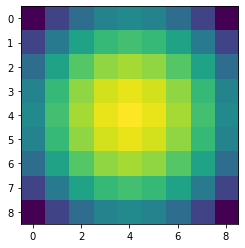

In [13]:
tensor_tmp = tf.math.exp(-tf.pow(x,2)/(2 * tf.pow(10.0,2)))
tensor_tmp = tensor_tmp / tf.math.sqrt(2 * 3.14159 * tf.pow(10.0,2))
tensor_tmp = tf.tensordot(tensor_tmp,tensor_tmp, axes = 0)
plt.imshow(tensor_tmp.numpy())

In [14]:
# tf.tensordot(tensor_tmp,tensor_tmp, axes = 0)